In [5]:
import pandas as pd
import numpy as np
import ast
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, auc, confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression


In [6]:
# Cargar los datos
remates = pd.read_csv('remates.csv')


In [9]:

X = remates[["distance"]]
y = remates[["goal"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

model_benchmark = LogisticRegression()
model_benchmark.fit(X_train, y_train)

c:\Users\Lucas Roman Gervasi\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [10]:
#Predicciones de probabilidad
y_proba_log = model_benchmark.predict_proba(X_test)[:, 1]

#Clasificación con umbral personalizado
threshold = 0.17
y_pred_custom = (y_proba_log > threshold).astype(int)

In [11]:
# 6. Métricas
print("F1 Score con threshold 0.17:", f1_score(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))

F1 Score con threshold 0.17: 0.34937838699394325
ROC AUC: 0.7572880965452076


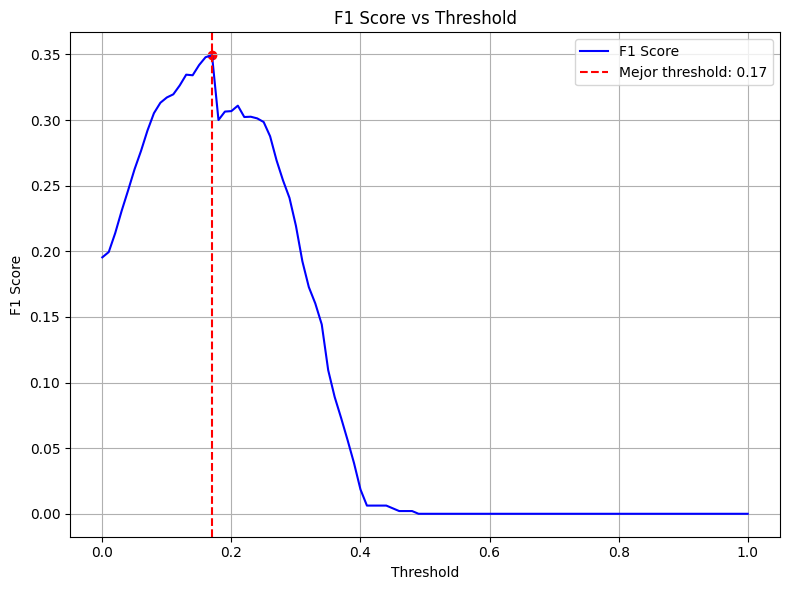

In [12]:
# Elección de thresholds
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
 y_pred = (y_proba_log > t).astype(int)
 f1 = f1_score(y_test, y_pred)
 f1_scores.append(f1)

# Mejor threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold: {best_threshold:.2f}')
plt.scatter(best_threshold, best_f1, color='red')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

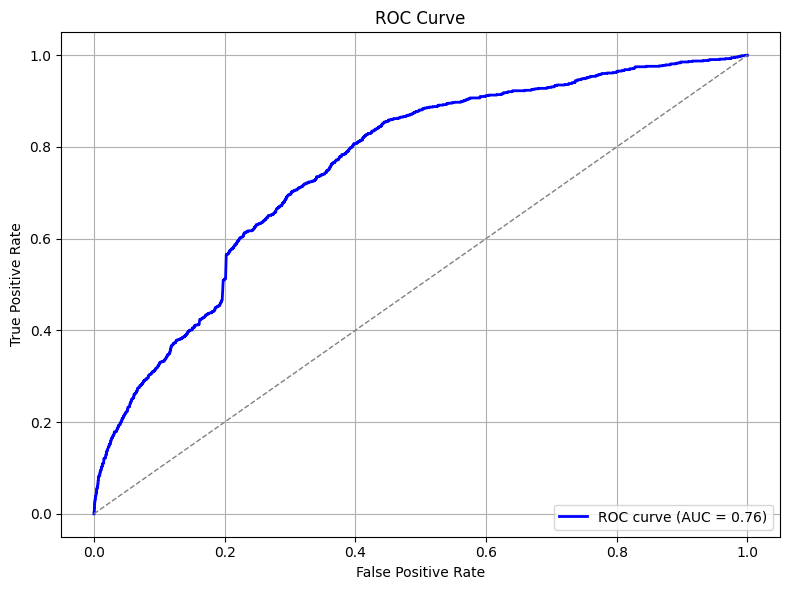

In [13]:
# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

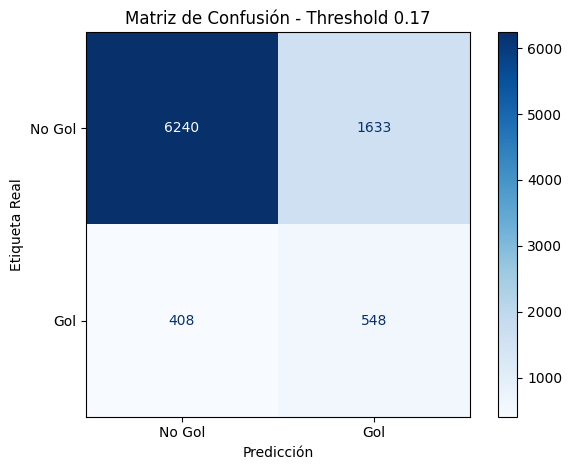

Verdaderos Negativos (TN): 6240
Falsos Positivos (FP): 1633
Falsos Negativos (FN): 408
Verdaderos Positivos (TP): 548


In [15]:
# Matriz de confusión con threshold personalizado
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.17")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [16]:
# SEGUNDO MODELO CON 2 VARIABLES
X = remates[['distance', 'angle']]
y = remates['goal']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['distance', 'angle']),
    ]
)

# Pipeline con preprocesamiento y regresión logística
modelo_log = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

modelo_log.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['distance', 'angle'])])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [17]:
#Predicciones de probabilidad
y_proba_log = modelo_log.predict_proba(X_test)[:, 1]

#Clasificación con umbral personalizado
threshold = 0.17
y_pred_custom = (y_proba_log > threshold).astype(int)

In [18]:
# 6. Métricas
print("F1 Score con threshold 0.17:", f1_score(y_test, y_pred_custom))
print("ROC AUC:", roc_auc_score(y_test, y_proba_log))

F1 Score con threshold 0.17: 0.3405275779376499
ROC AUC: 0.7528410358387986


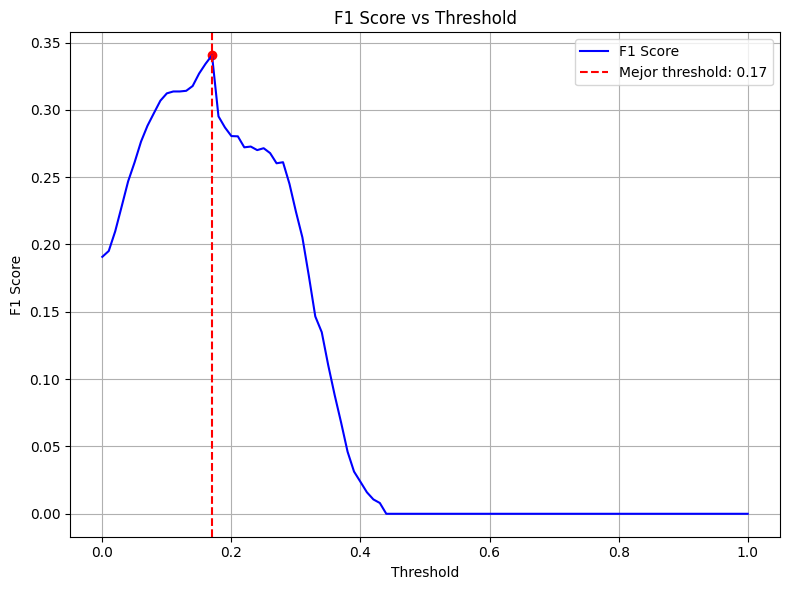

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Lista de thresholds a evaluar
thresholds = np.arange(0.0, 1.01, 0.01)
f1_scores = []

# Calcular F1 score para cada threshold
for t in thresholds:
    y_pred = (y_proba_log > t).astype(int)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)

# Encontrar el mejor threshold
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', color='blue')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold: {best_threshold:.2f}')
plt.scatter(best_threshold, best_f1, color='red')
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


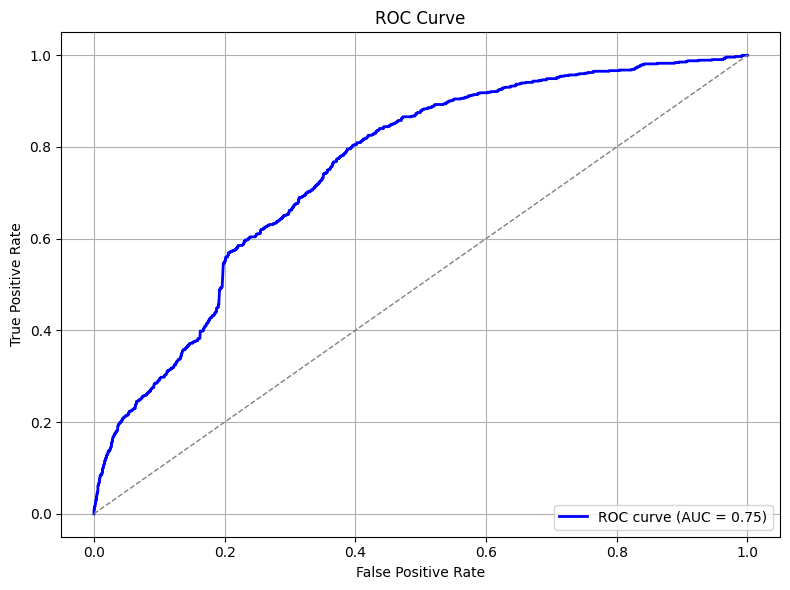

In [20]:
# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba_log)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

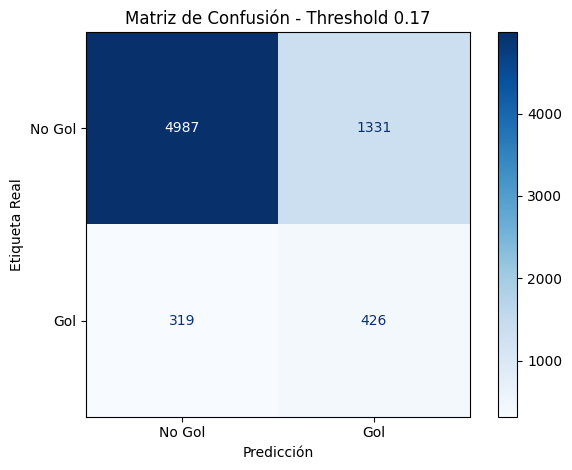

Verdaderos Negativos (TN): 4987
Falsos Positivos (FP): 1331
Falsos Negativos (FN): 319
Verdaderos Positivos (TP): 426


In [21]:
# Matriz de confusión con threshold personalizado
cm = confusion_matrix(y_test, y_pred_custom)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.17")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred_custom)
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [22]:
#Ambos modelos tienen desempeño muy parecido en F1 Score y
#precisión, pero el modelo con distancia + ángulo captura 
#un poco más goles reales (mejor recall)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Variables predictoras y objetivo
X2 = remates[['distance', 'angle', 'shot_aerial_won', 'habil_shot', 'goalkeeper_ingoal', 'shot_technique', 'play_pattern']]
y2 = remates['goal']

# División train-test
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42, stratify=y2)

# Variables categóricas
columnas_categoricas2 = ['shot_aerial_won', 'habil_shot', 'goalkeeper_ingoal', 'shot_technique', 'play_pattern']

# Preprocesador: codificación y escalado
preprocessor2 = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), columnas_categoricas2),
        ('num', StandardScaler(), ['distance', 'angle']),
    ]
)

# Pipeline
modelo_log_2 = Pipeline([
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

# Entrenar
modelo_log_2.fit(X_train2, y_train2)

# Predecir
y_pred2 = modelo_log_2.predict(X_test2)
y_proba_log2 = modelo_log_2.predict_proba(X_test2)[:, 1]


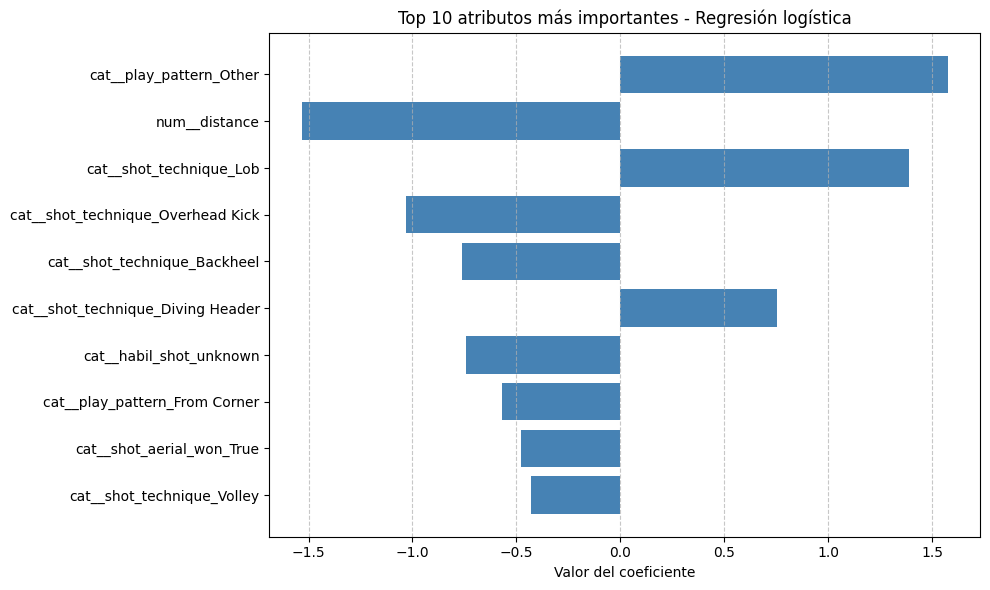

Top 10 atributos más importantes por valor absoluto de coeficiente:
                          feature  coefficient
          cat__play_pattern_Other     1.573780
                    num__distance    -1.533015
          cat__shot_technique_Lob     1.386391
cat__shot_technique_Overhead Kick    -1.029745
     cat__shot_technique_Backheel    -0.762460
cat__shot_technique_Diving Header     0.755231
          cat__habil_shot_unknown    -0.742376
    cat__play_pattern_From Corner    -0.568246
        cat__shot_aerial_won_True    -0.477706
       cat__shot_technique_Volley    -0.430711


In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya entrenaste tu pipeline con ColumnTransformer y regresión logística, por ejemplo:
# modelo_log_2.fit(X_train, y_train)

# Obtener los nombres de las variables procesadas por el ColumnTransformer
feature_names = modelo_log_2.named_steps["preprocessor"].get_feature_names_out()

# Obtener los coeficientes del clasificador (modelo_log_2 tiene un paso llamado "classifier")
coefs = modelo_log_2.named_steps["classifier"].coef_[0]

# Crear un DataFrame para manejar más fácil la info
coef_df = pd.DataFrame({
    "feature": feature_names,
    "coefficient": coefs,
    "abs_coefficient": np.abs(coefs)
})

# Ordenar por el valor absoluto del coeficiente y quedarnos con los 10 más grandes
top_coef = coef_df.sort_values("abs_coefficient", ascending=False).head(10)

# Graficar coeficientes (los negativos y positivos importan, por eso no usamos solo el absoluto)
plt.figure(figsize=(10, 6))
plt.barh(top_coef["feature"][::-1], top_coef["coefficient"][::-1], color='steelblue')
plt.xlabel("Valor del coeficiente")
plt.title("Top 10 atributos más importantes - Regresión logística")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


print("Top 10 atributos más importantes por valor absoluto de coeficiente:")
print(top_coef[["feature", "coefficient"]].to_string(index=False))

In [25]:
# play_pattern_Other: Situación de juego abierta o normal. Aumenta la probabilidad de gol.

# distance: Distancia al arco. A mayor distancia, menor probabilidad de gol.

# shot_aerial_won_True: Disparo tras ganar un balón aéreo. Disminuye la probabilidad de gol.

# shot_technique_Lob: Disparo tipo “vaselina” o globito. Aumenta la probabilidad de gol.

# goalkeeper_ingoal_True: Portero en línea de tiro. Disminuye la probabilidad de gol.

# habil_shot_False: Disparo con pie no hábil. Disminuye la probabilidad de gol.

# play_pattern_From Corner: Tiro desde un córner. Disminuye la probabilidad de gol.

# shot_technique_Backheel: Disparo con talón. Disminuye la probabilidad de gol.

# shot_technique_Overhead Kick: Disparo de chilena. Disminuye la probabilidad de gol.

# play_pattern_From Kick Off: Tiro tras saque inicial o reinicio. Disminuye la probabilidad de gol.

Mejor threshold: 0.68 con F1 score: 0.4329


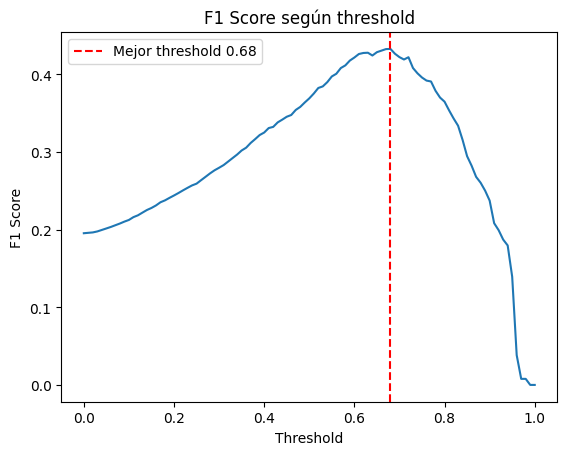

In [26]:
import numpy as np
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt

thresholds = np.arange(0, 1.01, 0.01)
f1_scores = []

for t in thresholds:
    y_pred = (y_proba_log2 > t).astype(int)
    f1_scores.append(f1_score(y_test2, y_pred))

best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]
best_f1 = f1_scores[best_idx]

print(f"Mejor threshold: {best_threshold:.2f} con F1 score: {best_f1:.4f}")

plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score según threshold')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor threshold {best_threshold:.2f}')
plt.legend()
plt.show()

In [27]:
y_proba_log2 = modelo_log_2.predict_proba(X_test2)[:, 1]
threshold2 = 0.68
y_pred_custom2 = (y_proba_log2 > threshold2).astype(int)

# Métricas
print("F1 Score con threshold 0.68:", f1_score(y_test2, y_pred_custom2))
print("ROC AUC:", roc_auc_score(y_test2, y_proba_log2))

F1 Score con threshold 0.68: 0.4329159212880143
ROC AUC: 0.8107658412152835


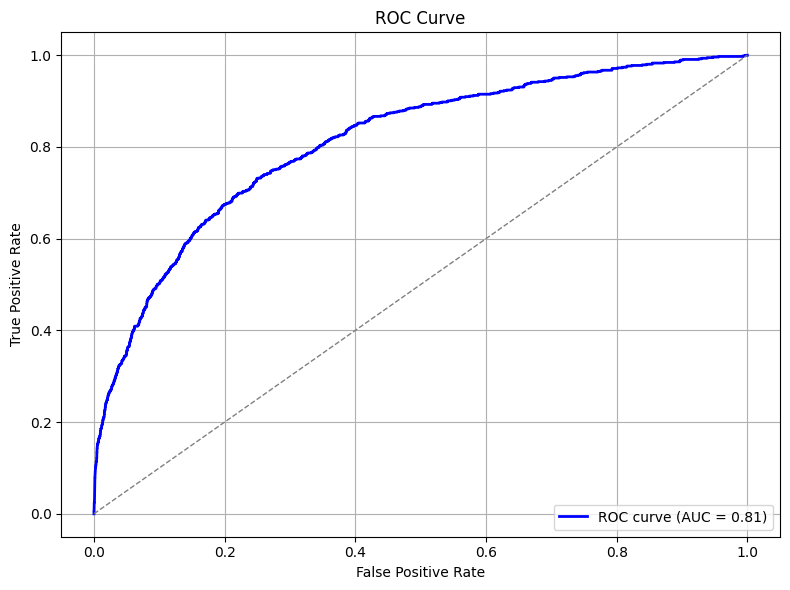

In [28]:
# Calcular FPR, TPR y thresholds
fpr, tpr, thresholds2 = roc_curve(y_test2, y_proba_log2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

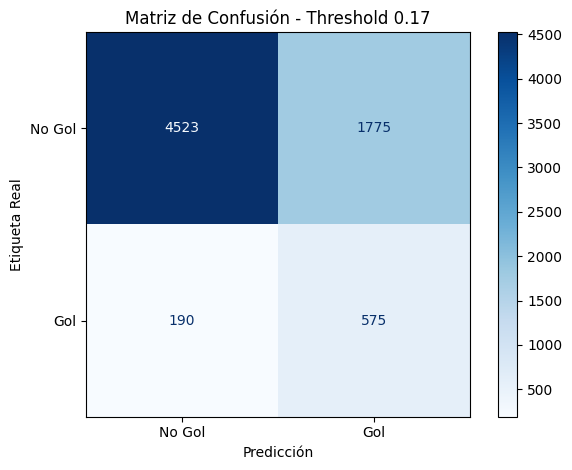

Verdaderos Negativos (TN): 4523
Falsos Positivos (FP): 1775
Falsos Negativos (FN): 190
Verdaderos Positivos (TP): 575


In [29]:
# Matriz de confusión con threshold personalizado
cm = confusion_matrix(y_test2, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Gol", "Gol"])

# Graficar matriz con colormap azul
disp.plot(cmap=plt.cm.Blues)

plt.title("Matriz de Confusión - Threshold 0.17")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta Real")
plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test2, y_pred2)
tn, fp, fn, tp = cm.ravel()
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")
print(f"Verdaderos Positivos (TP): {tp}")

In [30]:
import pandas as pd

# Supongamos que ya tenés:
# remates: DataFrame con todos los remates, y una columna 'goal' con 0/1 reales
# modelo_log_2: modelo entrenado con método predict_proba
# X_test2: conjunto de test con las features para predecir
# y_test: etiquetas reales para el set de test (opcional, si la tenés)
# X_total: todo el dataset (features) para predecir (debe coincidir con remates)

# --- Probabilidades y comparación para el set de test ---
probabilidades_test = modelo_log_2.predict_proba(X_test2)[:, 1]
probabilidades_test_df = pd.DataFrame(probabilidades_test, columns=['probabilidad_gol'])
X_probabilidades_test = pd.concat([X_test2.reset_index(drop=True), probabilidades_test_df], axis=1)

print("Sumatoria de goles reales en test:", y_test2.sum())
print("Suma de probabilidades predichas en test:", X_probabilidades_test.probabilidad_gol.sum())




Sumatoria de goles reales en test: 765
Suma de probabilidades predichas en test: 2755.6505515674353


In [31]:
from sklearn.model_selection import cross_val_score

f1_cv_2 = cross_val_score(modelo_log_2, X2, y2, cv=5, scoring='f1')
roc_auc_cv_2 = cross_val_score(modelo_log_2, X2, y2, cv=5, scoring='roc_auc')

print("F1 Score CV promedio (modelo_log_2):", f1_cv_2.mean())
print("ROC AUC CV promedio (modelo_log_2):", roc_auc_cv_2.mean())

F1 Score CV promedio (modelo_log_2): 0.36589924139544217
ROC AUC CV promedio (modelo_log_2): 0.8051064007510662


In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
# Extraer el preprocesador y el modelo
preprocessor = modelo_log_2.named_steps['preprocessor']
log_reg = modelo_log_2.named_steps['classifier']

# Obtener los nombres de las columnas transformadas
cat_features = preprocessor.named_transformers_['cat'].get_feature_names_out(columnas_categoricas2)
num_features = ['distance', 'angle']
features_names = np.concatenate([cat_features, num_features])

# Obtener coeficientes del modelo
coef = log_reg.coef_[0]

# Crear dataframe con coeficientes y nombres
coef_df = pd.DataFrame({'feature': features_names, 'coeficiente': coef})

# Ordenar por valor absoluto descendente
coef_df = coef_df.reindex(coef_df.coeficiente.abs().sort_values(ascending=False).index)

print(coef_df)

                         feature  coeficiente
21            play_pattern_Other     1.573780
23                      distance    -1.533015
10            shot_technique_Lob     1.386391
12  shot_technique_Overhead Kick    -1.029745
7        shot_technique_Backheel    -0.762460
8   shot_technique_Diving Header     0.755231
4             habil_shot_unknown    -0.742376
14      play_pattern_From Corner    -0.568246
1           shot_aerial_won_True    -0.477706
13         shot_technique_Volley    -0.430711
3                habil_shot_True     0.364884
9     shot_technique_Half Volley    -0.350732
6         goalkeeper_ingoal_True    -0.342878
22     play_pattern_Regular Play    -0.301554
19    play_pattern_From Kick Off    -0.300357
20    play_pattern_From Throw In    -0.265208
17   play_pattern_From Goal Kick    -0.264374
24                         angle     0.180166
0          shot_aerial_won_False     0.144847
16   play_pattern_From Free Kick    -0.119811
11         shot_technique_Normal  

In [33]:
# Asegurate de usar las mismas columnas que usaste para entrenar
X_all = remates[['distance', 'angle', 'shot_aerial_won', 'habil_shot', 'goalkeeper_ingoal', 'shot_technique', 'play_pattern']]

# Predecir probabilidades para todo el dataset
y_proba_all = modelo_log_2.predict_proba(X_all)[:, 1]

# Agregar la columna xG al DataFrame completo
remates['xG'] = y_proba_all

# Guardar
remates.to_csv('remates_con_xG_todo.csv', index=False)

In [ ]:
# Agregar la columna 'goal' a las columnas de interés
columnas_interes = ['distance', 'angle', 'shot_aerial_won', 'habil_shot', 
                    'goalkeeper_ingoal', 'shot_technique', 'play_pattern', 'xG', 'goal']

# 10 filas con gol (goal == 1)
goles = remates[remates['goal'] == 1][columnas_interes].head(20)

# 10 filas sin gol (goal == 0)
no_goles = remates[remates['goal'] == 0][columnas_interes].head(20)

# Combinar y resetear índice
muestra = pd.concat([goles, no_goles]).reset_index(drop=True)

print(muestra)